## Automating Crypto Website API Pull Using Python

In [25]:
  
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '59bcb26f-7b51-44ed-80b9-009b3229a69a',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

## If rate limit error appeared go to windows search--> anaconda prompt --> 
    ## (base)  D:\>\Github\Data-Analysis-Portfolio> "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
## Open the link from in anacoda prompt to open the modified notebook 
#    To access the server, open this file in a browser:
#        file:///C:/Users/aliba/AppData/Roaming/jupyter/runtime/jpserver-4316-open.html
#    Or copy and paste one of these URLs:
#        http://localhost:8889/tree?token=f3f8cb29e57ed967c3fda1528e9dcf9c276c0cbf0e64f985
#        http://127.0.0.1:8889/tree?token=f3f8cb29e57ed967c3fda1528e9dcf9c276c0cbf0e64f985

{'status': {'timestamp': '2024-07-14T08:04:31.646Z', 'error_code': 0, 'error_message': None, 'elapsed': 27, 'credit_count': 1, 'notice': None, 'total_count': 9972}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11597, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [26]:
type(data)

dict

In [62]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [30]:
## When we print(data), we noticed that all the details under section called "data".
## Therefore we will normalize data nested in data.
## It is better to add a timestamp at the end column to know when the data was pulled
df = pd.json_normalize(data['data'])
df['time_stamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,1,Bitcoin,BTC,bitcoin,11597,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.972028e+07,1.972028e+07,False,NaN,1,NaN,NaN,None,2024-07-14T08:03:00.000Z,60162.499208,2.127895e+10,-3.5113,0.415096,3.455847,4.786607,-10.025067,-3.307157,-9.384820,1.186421e+12,53.6689,1.263412e+12,None,2024-07-14T08:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 11:04:40.849446
1,1027,Ethereum,ETH,ethereum,9132,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202157e+08,1.202157e+08,True,NaN,2,NaN,NaN,None,2024-07-14T08:02:00.000Z,3200.415933,9.857456e+09,-12.1887,0.308283,1.970135,6.451964,-8.977202,9.681064,-1.538615,3.847403e+11,17.4057,3.847403e+11,None,2024-07-14T08:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 11:04:40.849446
2,825,Tether USDt,USDT,tether,91518,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.124669e+11,1.160722e+11,True,NaN,3,NaN,NaN,None,2024-07-14T08:02:00.000Z,1.000511,3.984906e+10,-3.6147,0.013915,0.024835,0.050958,0.108763,0.075647,-0.052919,1.125244e+11,5.0889,1.161315e+11,None,2024-07-14T08:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-14 11:04:40.849446
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475823e+08,1.475823e+08,False,NaN,4,NaN,NaN,None,2024-07-14T08:02:00.000Z,538.226017,1.522607e+09,1.2192,0.191637,0.399880,5.643609,-11.419225,-5.472518,-6.631306,7.943263e+10,3.5935,7.943263e+10,None,2024-07-14T08:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 11:04:40.849446
4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.640635e+08,5.801433e+08,True,NaN,5,NaN,NaN,None,2024-07-14T08:02:00.000Z,144.995086,1.610188e+09,2.3138,0.277160,4.001442,4.171552,-1.754909,0.437588,-5.948923,6.728693e+10,3.0441,8.411792e+10,None,2024-07-14T08:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 11:04:40.849446
5,3408,USDC,USDC,usd-coin,20946,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.394910e+10,3.394910e+10,False,NaN,6,NaN,NaN,None,2024-07-14T08:02:00.000Z,1.000207,3.903070e+09,-14.7238,0.012794,0.018289,0.026400,0.017201,0.015147,0.013473,3.395614e+10,1.5362,3.395614e+10,None,2024-07-14T08:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-14 11:04:40.849446
6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.580534e+10,9.998745e+10,False,NaN,7,NaN,NaN,None,2024-07-14T08:03:00.000Z,0.526603,2.631836e+09,31.1298,0.203572,2.311254,20.431667,10.182033,5.337507,2.337515,2.938728e+10,1.3290,5.266033e+10,None,2024-07-14T08:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 11:04:40.849446
7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.506916e+09,5.108966e+09,True,NaN,8,3.414167e+09,2.507993e+10,None,2024-07-14T08:02:00.000Z,7.345844,1.722687e+08,-5.1785,0.165087,0.370778,-2.396527,-5.921808,5.443422,3.581900,1.841541e+10,0.8331,3.752966e+10,None,2024-07-14T08:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 11:04:40.849446
8,74,Dogecoin,DOGE,dogecoin,1021,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.451090e+

In [77]:
## Steps to Automate the process

## Frist create a function

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '59bcb26f-7b51-44ed-80b9-009b3229a69a',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


 ## In the below part we need to append the new data to the existing from previous time we run the code.
    
    df2 = pd.json_normalize(data['data'])
    df2['time_stamp'] = pd.to_datetime('now')
    df = df2._append(df2)

 ## Creating and upodating the CSV  
    if not os.path.isfile(r'D:\Github\Data-Analysis-Portfolio\Data Analysis Projects\Automating Crypto Website API Pull Using Python\Crypto_Status.csv'):
        df.to_csv(r'D:\Github\Data-Analysis-Portfolio\Data Analysis Projects\Automating Crypto Website API Pull Using Python\Crypto_Status.csv',
                  header = 'column_names')
    else:
        df.to_csv(r'D:\Github\Data-Analysis-Portfolio\Data Analysis Projects\Automating Crypto Website API Pull Using Python\Crypto_Status.csv',
                  mode = 'a', header = False)  ## mode a is for append


In [79]:
## Second: In this part we will setup the loop to call the function automatically

import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed successfully')
    sleep(60)  ## Sleep for a minute
exit()

API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully


KeyboardInterrupt: 

In [81]:
show_csv = pd.read_csv(r'D:\Github\Data-Analysis-Portfolio\Data Analysis Projects\Automating Crypto Website API Pull Using Python\Crypto_Status.csv')
show_csv

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,0,1,Bitcoin,BTC,bitcoin,11597,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.972028e+07,1.972028e+07,False,NaN,1,NaN,NaN,NaN,2024-07-14T08:38:00.000Z,60279.866351,2.176111e+10,0.4513,0.474156,3.721426,4.911681,-10.156022,-2.961745,-9.135311,1.188736e+12,53.6599,1.265877e+12,NaN,2024-07-14T08:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 11:39:21.780017
1,1,1027,Ethereum,ETH,ethereum,9132,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202157e+08,1.202157e+08,True,NaN,2,NaN,NaN,NaN,2024-07-14T08:37:00.000Z,3207.825694,9.994672e+09,-9.6001,0.386482,2.162585,6.628362,-8.839978,10.390902,-1.650082,3.856311e+11,17.3999,3.856311e+11,NaN,2024-07-14T08:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 11:39:21.780017
2,2,825,Tether USDt,USDT,tether,91518,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.124669e+11,1.160722e+11,True,NaN,3,NaN,NaN,NaN,2024-07-14T08:37:00.000Z,1.000376,4.033039e+10,-1.3110,-0.001317,0.005756,0.030205,0.098249,0.055792,-0.076142,1.125092e+11,5.0740,1.161158e+11,NaN,2024-07-14T08:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-14 11:39:21.780017
3,3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475823e+08,1.475823e+08,False,NaN,4,NaN,NaN,NaN,2024-07-14T08:37:00.000Z,539.165335,1.527570e+09,1.2907,0.166287,0.461292,5.928100,-11.228519,-4.839079,-6.787890,7.957126e+10,3.5903,7.957126e+10,NaN,2024-07-14T08:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 11:39:21.780017
4,4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.640634e+08,5.801432e+08,True,NaN,5,NaN,NaN,NaN,2024-07-14T08:37:00.000Z,145.230945,1.626524e+09,4.0892,0.155822,4.310566,4.263337,-2.019966,0.905469,-6.049932,6.739636e+10,3.0410,8.425474e+10,NaN,2024-07-14T08:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 11:39:21.780017
5,5,3408,USDC,USDC,usd-coin,20946,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.394913e+10,3.394913e+10,False,NaN,6,NaN,NaN,NaN,2024-07-14T08:37:00.000Z,0.999974,3.958671e+09,-11.6651,-0.008244,-0.007504,-0.002437,0.001231,-0.009544,-0.030100,3.394825e+10,1.5318,3.394825e+10,NaN,2024-07-14T08:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-14 11:39:21.780017
6,6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.580534e+10,9.998745e+10,False,NaN,7,NaN,NaN,NaN,2024-07-14T08:38:00.000Z,0.529112,2.627020e+09,32.4642,0.494914,3.051060,21.038142,10.424107,5.900451,2.195614,2.952730e+10,1.3332,5.291125e+10,NaN,2024-07-14T08:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 11:39:21.780017
7,7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2.506915e+09,5.108965e+09,True,NaN,8,3.414167e+09,2.510586e+10,NaN,2024-07-14T08:37:00.000Z,7.353436,1.768370e+08,-0.7082,0.126613,0.547220,-2.069901,-6.622271,5.339031,4.335126,1.843444e+10,0.8318,3.756845e+10,NaN,2024-07-14T08:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 11:39:21.780017
8,8,74,Dogecoin,DOGE,dogecoin,1021,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha.

In [83]:
## Cleaning the data

## Get rid of scientific notation

pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [85]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,1,Bitcoin,BTC,bitcoin,11597,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19720284.00000,19720284.00000,False,NaN,1,NaN,NaN,None,2024-07-14T08:41:00.000Z,60258.50802,21803551954.52932,0.75410,0.41733,3.67136,4.87933,-10.22350,-2.95752,-9.16205,1188314891500.72119,53.64090,1265428668345.50000,None,2024-07-14T08:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 11:42:26.882481
1,1027,Ethereum,ETH,ethereum,9132,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120215726.06015,120215726.06015,True,NaN,2,NaN,NaN,None,2024-07-14T08:40:00.000Z,3210.10069,9993505173.89237,-9.47100,0.47087,2.29356,6.74339,-8.78297,10.49295,-1.60447,385904585436.57587,17.41220,385904585436.58002,None,2024-07-14T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 11:42:26.882481
2,825,Tether USDt,USDT,tether,91518,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112466925458.78345,116072162582.33752,True,NaN,3,NaN,NaN,None,2024-07-14T08:40:00.000Z,1.00031,40344025671.16556,-1.11230,-0.00531,-0.03127,0.02030,0.09008,0.00716,-0.07564,112501582299.63303,5.07970,116107930382.06000,None,2024-07-14T08:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-14 11:42:26.882481
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582292.47149,147582292.47149,False,NaN,4,NaN,NaN,None,2024-07-14T08:40:00.000Z,539.62972,1527435051.44208,1.32720,0.24689,0.57768,6.09984,-11.21567,-4.72979,-6.74405,79639790846.83754,3.59340,79639790846.84000,None,2024-07-14T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 11:42:26.882481
4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,464063355.46958,580143186.30790,True,NaN,5,NaN,NaN,None,2024-07-14T08:40:00.000Z,145.32276,1626660920.28780,4.20250,0.22515,4.41755,4.47891,-2.01554,1.00797,-5.96337,67438967663.75042,3.04290,84308009069.53000,None,2024-07-14T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 11:42:26.882481
5,3408,USDC,USDC,usd-coin,20946,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33949129333.97851,33949129333.97851,False,NaN,6,NaN,NaN,None,2024-07-14T08:40:00.000Z,0.99987,3965475403.85075,-11.44410,-0.01256,-0.03245,-0.01572,-0.01121,-0.06489,-0.02507,33944853353.46751,1.53160,33944853353.47000,None,2024-07-14T08:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-14 11:42:26.882481
6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55805339473.00000,99987452475.00000,False,NaN,7,NaN,NaN,None,2024-07-14T08:41:00.000Z,0.53063,2629745523.52596,32.46550,0.76958,3.20658,21.41321,10.75827,6.22296,2.52048,29612209116.40826,1.33700,53063397510.08000,None,2024-07-14T08:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 11:42:26.882481
7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2506915125.03283,5108965054.36290,True,NaN,8,3414166606.00000,25114303755.90601,None,2024-07-14T08:40:00.000Z,7.35591,176951454.68796,-0.32350,0.16013,0.58042,-2.01048,-6.64211,5.41142,4.38213,18440643122.01567,0.83210,37581089343.47000,None,2024-07-14T08:40:00.0

In [105]:
## Group by coin name

avg_percentage_change = df.groupby('name', sort=False)[['quote.USD.percent_change_1h',	'quote.USD.percent_change_24h',	
                                'quote.USD.percent_change_7d',	'quote.USD.percent_change_30d',	'quote.USD.percent_change_60d',	
                                'quote.USD.percent_change_90d']].mean()
avg_percentage_change

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.41733,3.67136,4.87933,-10.22350,-2.95752,-9.16205
Ethereum,0.47087,2.29356,6.74339,-8.78297,10.49295,-1.60447
Tether USDt,-0.00531,-0.03127,0.02030,0.09008,0.00716,-0.07564
BNB,0.24689,0.57768,6.09984,-11.21567,-4.72979,-6.74405
Solana,0.22515,4.41755,4.47891,-2.01554,1.00797,-5.96337
USDC,-0.01256,-0.03245,-0.01572,-0.01121,-0.06489,-0.02507
XRP,0.76958,3.20658,21.41321,10.75827,6.22296,2.52048
Toncoin,0.16013,0.58042,-2.01048,-6.64211,5.41142,4.38213
Dogecoin,0.10532,4.34146,3.57335,-20.43969,-23.60810,-31.17559


In [107]:
## To pivot the table to visualize it easily we can use .stack()
avg_percentage_change1 = avg_percentage_change.stack()
avg_percentage_change2 = avg_percentage_change1.to_frame(name = 'Values') ## The data type from .stack is a series, so here we can change it back to frame
avg_percentage_change2

Values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.41733
            quote.USD.percent_change_24h   3.67136
            quote.USD.percent_change_7d    4.87933
            quote.USD.percent_change_30d -10.22350
            quote.USD.percent_change_60d  -2.95752
            quote.USD.percent_change_90d  -9.16205
Ethereum    quote.USD.percent_change_1h    0.47087
            quote.USD.percent_change_24h   2.29356
            quote.USD.percent_change_7d    6.74339
            quote.USD.percent_change_30d  -8.78297
            quote.USD.percent_change_60d  10.49295
            quote.USD.percent_change_90d  -1.60447
Tether USDt quote.USD.percent_change_1h   -0.00531
            quote.USD.percent_change_24h  -0.03127
            quote.USD.percent_change_7d    0.02030
            quote.USD.percent_change_30d   0.09008
            quote.USD.percent_change_60d   0.00716
            quote.USD.percent_change_90d  -0.07564
BNB         quote.USD.percent_change_1h    0.24689
            quote.USD.percent_change_24h   0.57768
            quote.USD.percent_change_7d    6.09984
            quote.USD.percent_change_30d -11.21567
            quote.USD.percent_change_60d  -4.72979
            quote.USD.percent_change_90d  -6.74405
Solana      quote.USD.percent_change_1h    0.22515
            quote.USD.percent_change_24h   4.41755
            quote.USD.percent_change_7d    4.47891
            quote.USD.percent_change_30d  -2.01554
            quote.USD.percent_change_60d   1.00797
            quote.USD.percent_change_90d  -5.96337
USDC        quote.USD.percent_change_1h   -0.01256
            quote.USD.percent_change_24h  -0.03245
            quote.USD.percent_change_7d   -0.01572
            quote.USD.percent_change_30d  -0.01121
            quote.USD.percent_change_60d  -0.06489
            quote.USD.percent_change_90d  -0.02507
XRP         quote.USD.percent_change_1h    0.76958
            quote.USD.percent_change_24h   3.20658
            quote.USD.percent_change_7d   21.41321
            quote.USD.percent_change_30d  10.75827
            quote.USD.percent_change_60d   6.22296
            quote.USD.percent_change_90d   2.52048
Toncoin     quote.USD.percent_change_1h    0.16013
            quote.USD.percent_change_24h   0.58042
            quote.USD.percent_change_7d   -2.01048
            quote.USD.percent_change_30d  -6.64211
            quote.USD.percent_change_60d   5.41142
            quote.USD.percent_change_90d   4.38213
Dogecoin    quote.USD.percent_change_1h    0.10532
            quote.USD.percent_change_24h   4.34146
            quote.USD.percent_change_7d    3.57335
            quote.USD.percent_change_30d -20.43969
            quote.USD.percent_change_60d -23.60810
            quote.USD.percent_change_90d -31.17559
Cardano     quote.USD.percent_change_1h    0.14634
            quote.USD.percent_change_24h   1.92443
            quote.USD.percent_change_7d   18.23883
            quote.USD.percent_change_30d   2.08982
            quote.USD.percent_change_60d   0.04462
            quote.USD.percent_change_90d -12.65398
TRON        quote.USD.percent_change_1h    0.28359
            quote.USD.percent_change_24h  -0.97683
            quote.USD.percent_change_7d    6.33815
            quote.USD.percent_change_30d  19.29610
            quote.USD.percent_change_60d  10.17908
            quote.USD.percent_change_90d  20.02851
Shiba Inu   quote.USD.percent_change_1h    0.30010
            quote.USD.percent_change_24h   3.85145
            quote.USD.percent_change_7d    7.07559
            quote.USD.percent_change_30d -19.32640
            quote.USD.percent_change_60d -26.66412
            quote.USD.percent_change_90d -26.08833
Avalanche   quote.USD.percent_change_1h    0.46981
            quote.USD.percent_change_24h   0.64040
            quote.USD.percent_change_7d   -0.88953
            quote.USD.percent_change_30d -18.10975
            quote.USD.percent_change_60d -19.54682
            quo

In [147]:
## Creating Index
pd.Index(range(91000))
avg_percentage_change3 = avg_percentage_change2.reset_index()
avg_percentage_change3

,name,level_1,Values
0,Bitcoin,quote.USD.percent_change_1h,0.41733
1,Bitcoin,quote.USD.percent_change_24h,3.67136
2,Bitcoin,quote.USD.percent_change_7d,4.87933
3,Bitcoin,quote.USD.percent_change_30d,-10.22350
4,Bitcoin,quote.USD.percent_change_60d,-2.95752
5,Bitcoin,quote.USD.percent_change_90d,-9.16205
6,Ethereum,quote.USD.percent_change_1h,0.47087
7,Ethereum,quote.USD.percent_change_24h,2.29356
8,Ethereum,quote.USD.percent_change_7d,6.74339
9,Ethereum,quote.USD.percent_change_30d,-8.78297


In [157]:
avg_percentage_change4 = avg_percentage_change3.rename(columns={"level_1": "percent_change" })
avg_percentage_change4

,name,percent_change,Values
0,Bitcoin,quote.USD.percent_change_1h,0.41733
1,Bitcoin,quote.USD.percent_change_24h,3.67136
2,Bitcoin,quote.USD.percent_change_7d,4.87933
3,Bitcoin,quote.USD.percent_change_30d,-10.22350
4,Bitcoin,quote.USD.percent_change_60d,-2.95752
5,Bitcoin,quote.USD.percent_change_90d,-9.16205
6,Ethereum,quote.USD.percent_change_1h,0.47087
7,Ethereum,quote.USD.percent_change_24h,2.29356
8,Ethereum,quote.USD.percent_change_7d,6.74339
9,Ethereum,quote.USD.percent_change_30d,-8.78297


In [161]:
avg_percentage_change4['percent_change'] = avg_percentage_change4['percent_change'].replace(['quote.USD.percent_change_1h',
                                                  'quote.USD.percent_change_24h',
                                                  'quote.USD.percent_change_7d',
                                                  'quote.USD.percent_change_30d',
                                                  'quote.USD.percent_change_60d',
                                                  'quote.USD.percent_change_90d'],
                                                 ['1h','24h','7d','30d','60d','90d'])
avg_percentage_change4

,name,percent_change,Values
0,Bitcoin,1h,0.41733
1,Bitcoin,24h,3.67136
2,Bitcoin,7d,4.87933
3,Bitcoin,30d,-10.22350
4,Bitcoin,60d,-2.95752
5,Bitcoin,90d,-9.16205
6,Ethereum,1h,0.47087
7,Ethereum,24h,2.29356
8,Ethereum,7d,6.74339
9,Ethereum,30d,-8.78297


In [129]:
## Now Visualization

import seaborn as sns
import matplotlib.pyplot as plt

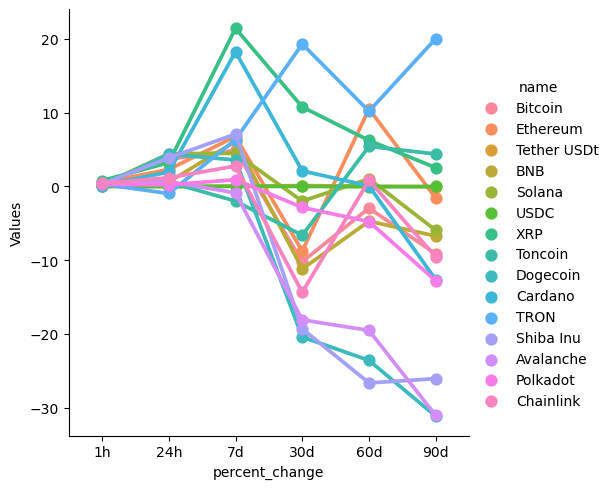

In [163]:
sns.catplot(x='percent_change', y='Values', hue='name', data=avg_percentage_change4, kind='point')

In [165]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,1,Bitcoin,BTC,bitcoin,11597,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19720284.00000,19720284.00000,False,NaN,1,NaN,NaN,None,2024-07-14T08:41:00.000Z,60258.50802,21803551954.52932,0.75410,0.41733,3.67136,4.87933,-10.22350,-2.95752,-9.16205,1188314891500.72119,53.64090,1265428668345.50000,None,2024-07-14T08:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 11:42:26.882481
1,1027,Ethereum,ETH,ethereum,9132,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120215726.06015,120215726.06015,True,NaN,2,NaN,NaN,None,2024-07-14T08:40:00.000Z,3210.10069,9993505173.89237,-9.47100,0.47087,2.29356,6.74339,-8.78297,10.49295,-1.60447,385904585436.57587,17.41220,385904585436.58002,None,2024-07-14T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 11:42:26.882481
2,825,Tether USDt,USDT,tether,91518,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112466925458.78345,116072162582.33752,True,NaN,3,NaN,NaN,None,2024-07-14T08:40:00.000Z,1.00031,40344025671.16556,-1.11230,-0.00531,-0.03127,0.02030,0.09008,0.00716,-0.07564,112501582299.63303,5.07970,116107930382.06000,None,2024-07-14T08:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-14 11:42:26.882481
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582292.47149,147582292.47149,False,NaN,4,NaN,NaN,None,2024-07-14T08:40:00.000Z,539.62972,1527435051.44208,1.32720,0.24689,0.57768,6.09984,-11.21567,-4.72979,-6.74405,79639790846.83754,3.59340,79639790846.84000,None,2024-07-14T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 11:42:26.882481
4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,464063355.46958,580143186.30790,True,NaN,5,NaN,NaN,None,2024-07-14T08:40:00.000Z,145.32276,1626660920.28780,4.20250,0.22515,4.41755,4.47891,-2.01554,1.00797,-5.96337,67438967663.75042,3.04290,84308009069.53000,None,2024-07-14T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 11:42:26.882481
5,3408,USDC,USDC,usd-coin,20946,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33949129333.97851,33949129333.97851,False,NaN,6,NaN,NaN,None,2024-07-14T08:40:00.000Z,0.99987,3965475403.85075,-11.44410,-0.01256,-0.03245,-0.01572,-0.01121,-0.06489,-0.02507,33944853353.46751,1.53160,33944853353.47000,None,2024-07-14T08:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-14 11:42:26.882481
6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55805339473.00000,99987452475.00000,False,NaN,7,NaN,NaN,None,2024-07-14T08:41:00.000Z,0.53063,2629745523.52596,32.46550,0.76958,3.20658,21.41321,10.75827,6.22296,2.52048,29612209116.40826,1.33700,53063397510.08000,None,2024-07-14T08:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 11:42:26.882481
7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2506915125.03283,5108965054.36290,True,NaN,8,3414166606.00000,25114303755.90601,None,2024-07-14T08:40:00.000Z,7.35591,176951454.68796,-0.32350,0.16013,0.58042,-2.01048,-6.64211,5.41142,4.38213,18440643122.01567,0.83210,37581089343.47000,None,2024-07-14T08:40:00.0

In [213]:
overview_status = show_csv[['name', 'quote.USD.price', 'time_stamp']]
overview_status

,name,quote.USD.price,time_stamp
0,Bitcoin,60279.86635,2024-07-14 11:39:21.780017
1,Ethereum,3207.82569,2024-07-14 11:39:21.780017
2,Tether USDt,1.00038,2024-07-14 11:39:21.780017
3,BNB,539.16533,2024-07-14 11:39:21.780017
4,Solana,145.23094,2024-07-14 11:39:21.780017
5,USDC,0.99997,2024-07-14 11:39:21.780017
6,XRP,0.52911,2024-07-14 11:39:21.780017
7,Toncoin,7.35344,2024-07-14 11:39:21.780017
8,Dogecoin,0.11392,2024-07-14 11:39:21.780017
9,Cardano,0.43109,2024-07-14 11:39:21.780017


C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='time_stamp', ylabel='quote.USD.price'>

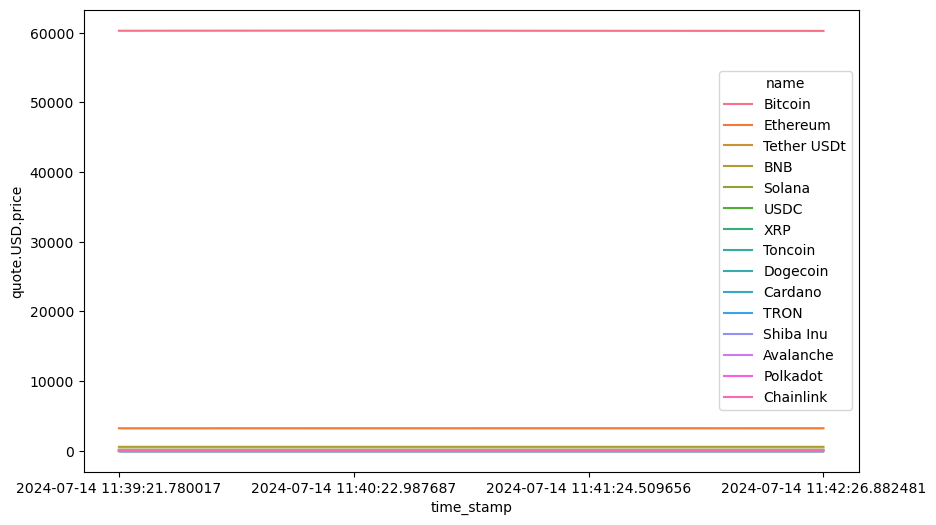

In [221]:
plt.subplots(figsize=(10, 6))
sns.lineplot(x='time_stamp', y='quote.USD.price', hue = 'name', data =overview_status)